# Time Series

By Vivian Zeng

U of Notre Dame

In [1]:
import pandas as pd

In [6]:
seattle = pd.read_csv("seattle_weather_2012-2015.csv")
seattle.head()

,date,precipitation,wind,weather,max_temp,min_temp
0,2012/01/01,0.0,4.7,drizzle,55.0,41.0
1,2012/01/02,10.9,4.5,rain,51.1,37.0
2,2012/01/03,0.8,2.3,rain,53.1,45.0
3,2012/01/04,20.3,4.7,rain,54.0,42.1
4,2012/01/05,1.3,6.1,rain,48.0,37.0


In [4]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   wind           1461 non-null   float64
 3   weather        1461 non-null   object 
 4   max_temp       1461 non-null   float64
 5   min_temp       1461 non-null   float64
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


1461 days and no missing values

In [7]:
# Convert date to a datetime object
seattle.date = pd.to_datetime(seattle.date)
seattle.head()

,date,precipitation,wind,weather,max_temp,min_temp
0,2012-01-01,0.0,4.7,drizzle,55.0,41.0
1,2012-01-02,10.9,4.5,rain,51.1,37.0
2,2012-01-03,0.8,2.3,rain,53.1,45.0
3,2012-01-04,20.3,4.7,rain,54.0,42.1
4,2012-01-05,1.3,6.1,rain,48.0,37.0


In [8]:
seattle[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1461 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.5 KB


the data type is now datetime64[ns] which is a datetime format based on the Numpy library that can handle up to nanosecond precision, this is the significance of the [ns]

In [9]:
# Convert date to datetime using read_csv()
seattle = pd.read_csv("seattle_weather_2012-2015.csv", parse_dates = ['date'])
seattle.head()

,date,precipitation,wind,weather,max_temp,min_temp
0,2012-01-01,0.0,4.7,drizzle,55.0,41.0
1,2012-01-02,10.9,4.5,rain,51.1,37.0
2,2012-01-03,0.8,2.3,rain,53.1,45.0
3,2012-01-04,20.3,4.7,rain,54.0,42.1
4,2012-01-05,1.3,6.1,rain,48.0,37.0


In [10]:
print([method for method in dir(pd.Series.dt) if not method.startswith('_')])

['asfreq', 'ceil', 'components', 'date', 'day', 'day_name', 'dayofweek', 'dayofyear', 'days', 'days_in_month', 'daysinmonth', 'end_time', 'floor', 'freq', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'microsecond', 'microseconds', 'minute', 'month', 'month_name', 'nanosecond', 'nanoseconds', 'normalize', 'quarter', 'qyear', 'round', 'second', 'seconds', 'start_time', 'strftime', 'time', 'timetz', 'to_period', 'to_pydatetime', 'to_pytimedelta', 'to_timestamp', 'total_seconds', 'tz', 'tz_convert', 'tz_localize', 'week', 'weekday', 'weekofyear', 'year']


In [11]:
help(pd.Series.dt.year)

Help on property:

    The year of the datetime.



year - extract the year

quarter - extract the quarter of the year (1, 2, 3, 4)

month - extract the month as a number (1 - 12)

dayofweek - extract the day of the week as a number (Mon = 0, Tues = 1, Wed = 2, Thurs = 3, Fri = 4, Sat = 5, Sun = 6)

week - extract the week of the year as number (1 - 52)

hour - extract the hour

minute - extract the minute

is_leap_year - boolean indicator if date belongs to leap year

is_month_start, .is_month_end - boolean indicator if date is the beginning or ending of a month

In [13]:
# Extract the year
seattle['date'].dt.year.head()

0    2012
1    2012
2    2012
3    2012
4    2012
Name: date, dtype: int64

In [14]:
# Extract the month
seattle['date'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

In [15]:
# Extract the day of the week
seattle['date'].dt.dayofweek.head()

0    6
1    0
2    1
3    2
4    3
Name: date, dtype: int64

In [16]:
# Determine if beginning of month
seattle['date'].dt.is_month_start.head()

0     True
1    False
2    False
3    False
4    False
Name: date, dtype: bool

In [17]:
# Was the year a leap year?
seattle['date'].dt.is_leap_year.head()

0    True
1    True
2    True
3    True
4    True
Name: date, dtype: bool

In [18]:
# Extract the name of the day of the week for the observation
seattle['date'].dt.day_name().head()

0       Sunday
1       Monday
2      Tuesday
3    Wednesday
4     Thursday
Name: date, dtype: object

In [19]:
# Extract the month name for the observation
seattle['date'].dt.month_name().head()

0    January
1    January
2    January
3    January
4    January
Name: date, dtype: object

In [20]:
# Set date to be index
seattle.set_index('date', inplace = True)
seattle.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

In [21]:
# View head() after setting index
seattle.head()

,precipitation,wind,weather,max_temp,min_temp
date,,,,,
2012-01-01,0.0,4.7,drizzle,55.0,41.0
2012-01-02,10.9,4.5,rain,51.1,37.0
2012-01-03,0.8,2.3,rain,53.1,45.0
2012-01-04,20.3,4.7,rain,54.0,42.1
2012-01-05,1.3,6.1,rain,48.0,37.0


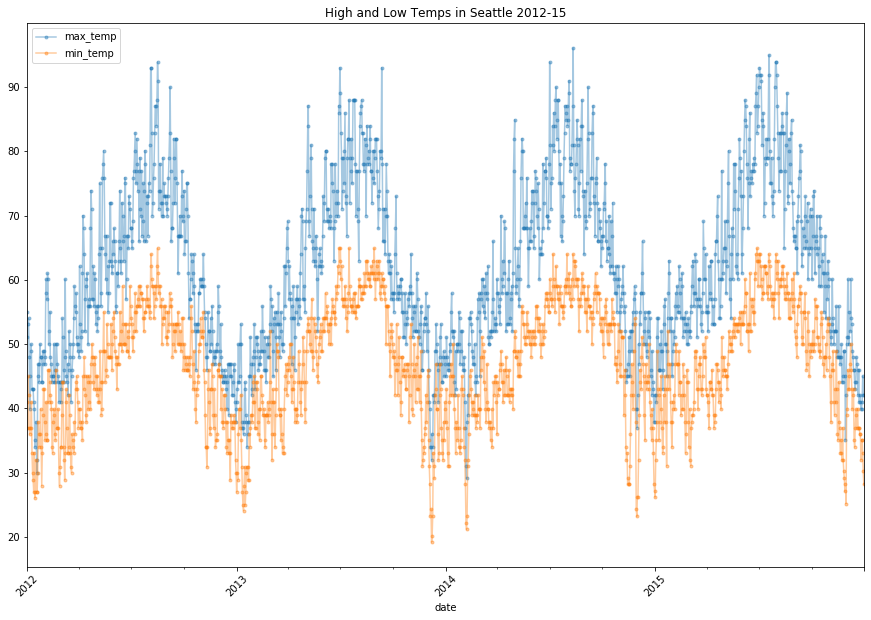

In [22]:
# Plot the high and low temperatures for the Seattle data
%matplotlib inline
seattle[['max_temp', 'min_temp']].plot(rot = 45, 
                                       figsize = (15, 10), 
                                       marker = ".", 
                                       alpha = 0.4,
                                       title = "High and Low Temps in Seattle 2012-15")

In [23]:
# Extract data for 2015-03-05
seattle.loc['2015-03-05']

precipitation       0
wind              1.3
weather           sun
max_temp         55.9
min_temp           37
Name: 2015-03-05 00:00:00, dtype: object

In [24]:
# Extract all Feb 2013 data
seattle.loc['2013-02']

,precipitation,wind,weather,max_temp,min_temp
date,,,,,
2013-02-01,0.3,2.9,rain,53.1,41.0
2013-02-02,0.0,2.0,drizzle,43.0,37.0
2013-02-03,2.3,2.9,rain,48.0,37.0
2013-02-04,0.0,2.6,rain,51.1,44.1
2013-02-05,3.3,5.1,rain,50.0,44.1
2013-02-06,1.0,4.5,rain,51.1,43.0
2013-02-07,1.3,4.1,rain,48.9,37.9
2013-02-08,0.0,1.3,sun,46.0,36.0
2013-02-09,0.3,1.3,rain,46.9,39.9


In [25]:
# Extract data from Oct 7-10th of 2014
seattle.loc['2014-10-07':'2014-10-10']

,precipitation,wind,weather,max_temp,min_temp
date,,,,,
2014-10-07,0.0,1.0,fog,66.0,57.0
2014-10-08,0.0,1.8,fog,69.1,55.0
2014-10-09,0.0,1.0,fog,63.0,52.0
2014-10-10,0.3,3.8,fog,64.9,50.0


In [26]:
# Extract temperature data from Oct 7-10th of 2014
seattle.loc['2014-10-07':'2014-10-10', ['min_temp', 'max_temp']]

,min_temp,max_temp
date,,
2014-10-07,57.0,66.0
2014-10-08,55.0,69.1
2014-10-09,52.0,63.0
2014-10-10,50.0,64.9


In [27]:
# Calculate the average high temperature by month
seattle.resample('M').agg({'max_temp':'mean'}).head(12)

,max_temp
date,
2012-01-31,44.700000
2012-02-29,48.703448
2012-03-31,49.200000
2012-04-30,58.770000
2012-05-31,63.787097
2012-06-30,65.646667
2012-07-31,73.225806
2012-08-31,78.541935
2012-09-30,73.180000


In [28]:
# Calculate the mean high temp in Jan 2012 using older methods
seattle.loc['2012-01-01':'2012-01-31']['max_temp'].mean()

44.7

In [29]:
# Calculate the average high temperature by every three-month interval
seattle.resample('3M').agg({'max_temp':'mean'})

,max_temp
date,
2012-01-31,44.700000
2012-04-30,52.230000
2012-07-31,67.573913
2012-10-31,70.711957
2013-01-31,46.736957
2013-04-30,53.970787
2013-07-31,73.388043
2013-10-31,69.008696
2014-01-31,49.154348


In [30]:
# Aggregate over two week intervals and get the min, median, and max
# high temperature and low temperature
seattle.resample('2W').agg({'max_temp':['min', 'median', 'max'],
                            'min_temp':['min', 'median', 'max']}).head()

max_temp              min_temp             
                min median   max      min median   max
date                                                  
2012-01-01     55.0  55.00  55.0     41.0  41.00  41.0
2012-01-15     34.0  44.00  54.0     26.1  36.50  45.0
2012-01-29     30.0  44.55  50.0     27.0  33.55  39.9
2012-02-12     46.9  51.00  61.0     35.1  41.00  46.0
2012-02-26     41.0  45.00  50.0     30.0  37.00  46.0

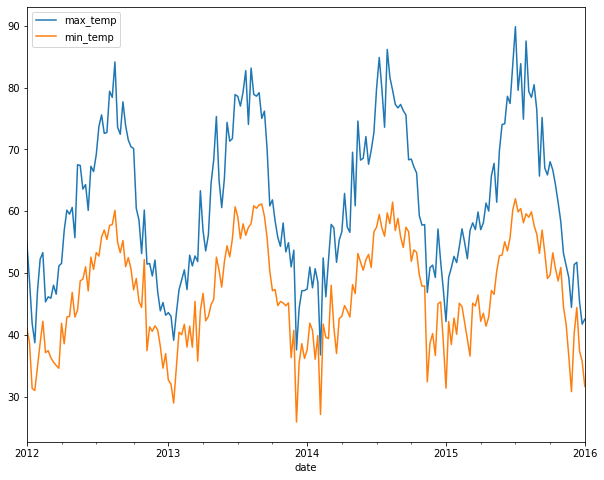

In [32]:
# Average weekly high and low temperature
seattle.resample('W').agg({'max_temp':'mean', 
                           'min_temp':'mean'}).plot(figsize = (10,8))

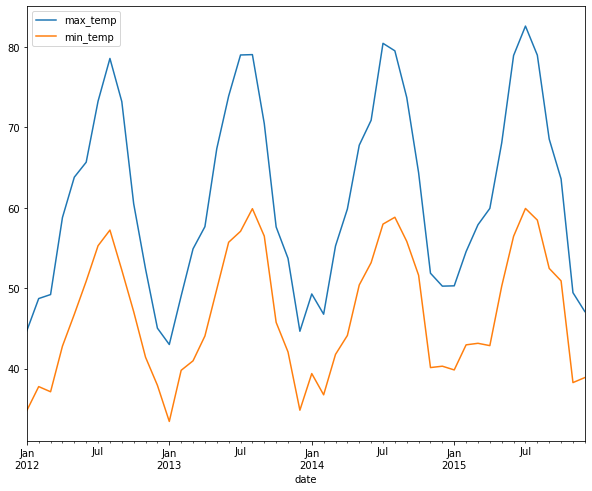

In [33]:
# Average monthly high and low temperature
seattle.resample('M').agg({'max_temp':'mean', 
                           'min_temp':'mean'}).plot(figsize = (10,8))

In [34]:
# 5 day rolling window
# Note:the first four observations are NaN
(
seattle
    .rolling(window = 5)
    .agg({'max_temp':'mean'})
    .head(10)
)

,max_temp
date,
2012-01-01,NaN
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,52.24
2012-01-06,49.22
2012-01-07,48.00
2012-01-08,47.38
2012-01-09,46.36


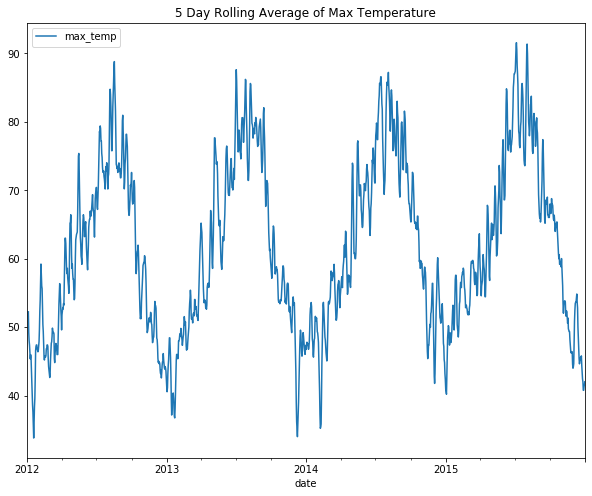

In [35]:
# Visualize maximum temperature using 5 day rolling window
(
seattle
    .rolling(window = 5)
    .agg({'max_temp':'mean'})
    .plot(figsize = (10, 8),
          title = '5 Day Rolling Average of Max Temperature')
)

In [36]:
# Compare to 5 day CENTERED rolling window
# Note, the first two observations are NaN
(
seattle
    .rolling(window = 5, center = True)
    .agg({'max_temp':'mean'})
    .head(5)
)

,max_temp
date,
2012-01-01,NaN
2012-01-02,NaN
2012-01-03,52.24
2012-01-04,49.22
2012-01-05,48.00


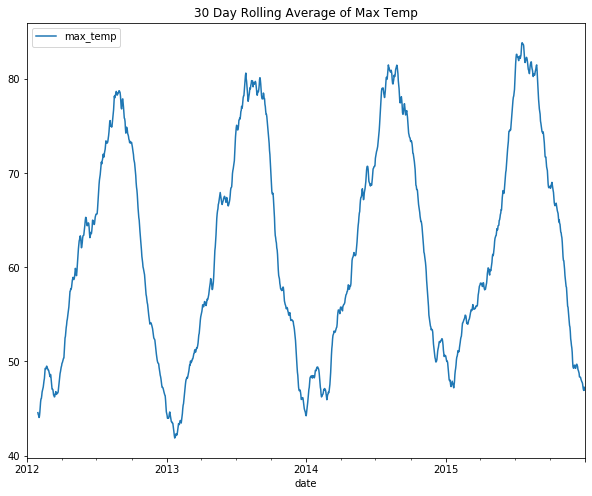

In [37]:
# 30 day rolling window
# Notice how much smoother the trend is

(
seattle
    .rolling(window = 30)
    .agg({'max_temp':'mean'})
    .plot(figsize = (10, 8),
          title = '30 Day Rolling Average of Max Temp')
)

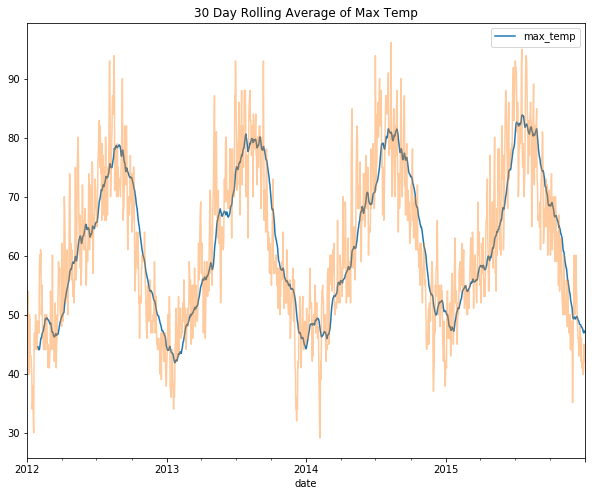

In [38]:
# 30 day rolling window
# Notice how much smoother the trend is

ax = (
seattle
    .rolling(window = 30)
    .agg({'max_temp':'mean'})
    .plot(figsize = (10, 8),
          title = '30 Day Rolling Average of Max Temp')
)
seattle['max_temp'].plot(ax = ax, alpha = 0.4)

In [41]:
%matplotlib inline

seattle = pd.read_csv("seattle_weather_2012-2015.csv", 
                      parse_dates = ['date'],
                      index_col = 'date')
seattle.head()

,precipitation,wind,weather,max_temp,min_temp
date,,,,,
2012-01-01,0.0,4.7,drizzle,55.0,41.0
2012-01-02,10.9,4.5,rain,51.1,37.0
2012-01-03,0.8,2.3,rain,53.1,45.0
2012-01-04,20.3,4.7,rain,54.0,42.1
2012-01-05,1.3,6.1,rain,48.0,37.0


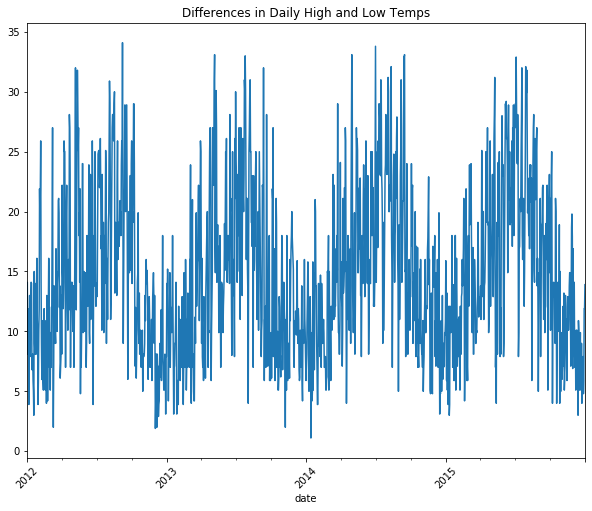

In [39]:
# Investigate difference in high and low daily temperature
seattle['temp_diffs'] = seattle['max_temp'] - seattle['min_temp']
seattle['temp_diffs'].plot(figsize = (10, 8),
                           rot = 45,
                           title = 'Differences in Daily High and Low Temps')

In [42]:
# Investigate day-to-day differences in temperature
seattle[['max_temp', 'min_temp']].diff(periods = 1).head()

,max_temp,min_temp
date,,
2012-01-01,NaN,NaN
2012-01-02,-3.9,-4.0
2012-01-03,2.0,8.0
2012-01-04,0.9,-2.9
2012-01-05,-6.0,-5.1


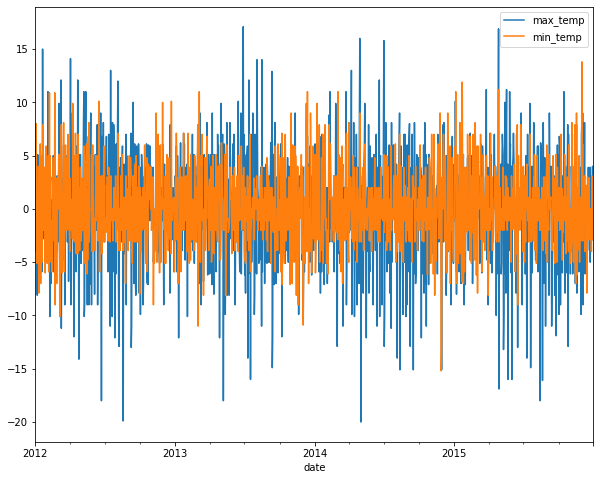

In [43]:
# Plot the day-to-day differences in temperature
seattle[['max_temp', 'min_temp']].diff().plot(figsize = (10,8))

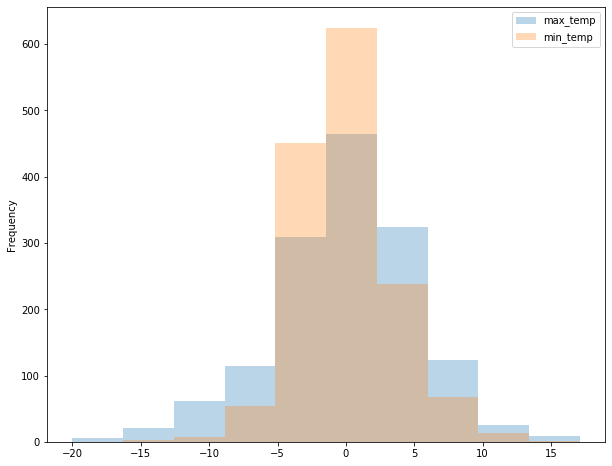

In [44]:
# Histogram of day-to-day differences in temperature

seattle[['max_temp', 'min_temp']].diff().plot(kind = 'hist', 
                                              alpha = 0.3,
                                              figsize = (10, 8))

In [45]:
# downsample to monthly time-series
by_month = seattle.resample('M').agg({'max_temp':'mean', 
                                      'min_temp':'mean'})
by_month.head()

,max_temp,min_temp
date,,
2012-01-31,44.700000,34.780645
2012-02-29,48.703448,37.762069
2012-03-31,49.200000,37.119355
2012-04-30,58.770000,42.786667
2012-05-31,63.787097,46.745161


In [46]:
# add date back as a column to DataFrame
by_month.reset_index(inplace = True)
by_month.head()

,date,max_temp,min_temp
0,2012-01-31,44.700000,34.780645
1,2012-02-29,48.703448,37.762069
2,2012-03-31,49.200000,37.119355
3,2012-04-30,58.770000,42.786667
4,2012-05-31,63.787097,46.745161


In [47]:
# Create new column with month names
by_month['month'] = by_month['date'].dt.month_name()
by_month.head()

,date,max_temp,min_temp,month
0,2012-01-31,44.700000,34.780645,January
1,2012-02-29,48.703448,37.762069,February
2,2012-03-31,49.200000,37.119355,March
3,2012-04-30,58.770000,42.786667,April
4,2012-05-31,63.787097,46.745161,May


In [48]:
# Aggregate by month and sort values by temp
(
by_month.groupby('month')
    .agg({'max_temp':'mean','min_temp':'mean'})
    .sort_values('max_temp')
)

,max_temp,min_temp
month,,
December,46.748387,37.982258
January,46.812903,36.856452
February,49.758898,39.309267
November,51.840000,40.465833
March,54.298387,40.746774
April,59.037500,43.451667
October,61.500000,48.829839
May,66.733065,49.312097
September,71.461667,54.243333


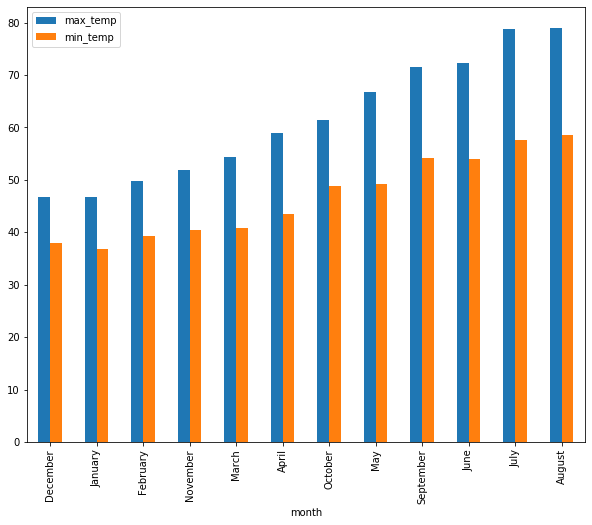

In [49]:
# Visualize temperature distribution by Month and sort by Temperature
(
by_month.groupby('month')
    .agg({'max_temp':'mean','min_temp':'mean'})
    .sort_values('max_temp')
    .plot(kind = 'bar',
          figsize = (10, 8))    
)

In [2]:
# Notebook setup
import pandas as pd
%matplotlib inline

seattle = pd.read_csv("seattle_weather_2012-2015.csv", 
                      parse_dates = ['date'],
                      index_col = 'date')
seattle.head()

,precipitation,wind,weather,max_temp,min_temp
date,,,,,
2012-01-01,0.0,4.7,drizzle,55.0,41.0
2012-01-02,10.9,4.5,rain,51.1,37.0
2012-01-03,0.8,2.3,rain,53.1,45.0
2012-01-04,20.3,4.7,rain,54.0,42.1
2012-01-05,1.3,6.1,rain,48.0,37.0


In [3]:
# Create a copy of the seattle data
seattle_ts = seattle.copy()

In [4]:
# Reset the index to bring date in as column
seattle_ts.reset_index(inplace = True)
seattle_ts.head()

,date,precipitation,wind,weather,max_temp,min_temp
0,2012-01-01,0.0,4.7,drizzle,55.0,41.0
1,2012-01-02,10.9,4.5,rain,51.1,37.0
2,2012-01-03,0.8,2.3,rain,53.1,45.0
3,2012-01-04,20.3,4.7,rain,54.0,42.1
4,2012-01-05,1.3,6.1,rain,48.0,37.0


In [5]:
# Extract only the variables of interest
seattle_ts = seattle_ts[['date', 'max_temp']]
seattle_ts.head()

,date,max_temp
0,2012-01-01,55.0
1,2012-01-02,51.1
2,2012-01-03,53.1
3,2012-01-04,54.0
4,2012-01-05,48.0


In [6]:
# Rename the columns as necessary
seattle_ts.rename({'date': 'ds', 'max_temp':'y'}, 
                  axis = 'columns', 
                  inplace = True)
seattle_ts.head()

,ds,y
0,2012-01-01,55.0
1,2012-01-02,51.1
2,2012-01-03,53.1
3,2012-01-04,54.0
4,2012-01-05,48.0


In [7]:
#pip install plotly

In [8]:
# Import Prophet
from fbprophet import Prophet
import plotly

# Create a new Prophet object
model = Prophet()
print(model)

# Fit the model to the historical data
model.fit(seattle_ts)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# Create DataFrame with future dates to predict at
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1821,2016-12-26
1822,2016-12-27
1823,2016-12-28
1824,2016-12-29
1825,2016-12-30


In [10]:
# Make predictions for next year
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,58.650915,35.178215,50.375245,58.650915,58.650915,-15.763320,-15.763320,-15.763320,0.158571,0.158571,0.158571,-15.921891,-15.921891,-15.921891,0.0,0.0,0.0,42.887595
1,2012-01-02,58.655062,35.631328,51.231935,58.655062,58.655062,-15.175752,-15.175752,-15.175752,0.743757,0.743757,0.743757,-15.919508,-15.919508,-15.919508,0.0,0.0,0.0,43.479310
2,2012-01-03,58.659208,35.089489,50.200441,58.659208,58.659208,-16.035212,-16.035212,-16.035212,-0.122741,-0.122741,-0.122741,-15.912472,-15.912472,-15.912472,0.0,0.0,0.0,42.623996
3,2012-01-04,58.663355,34.429813,49.923582,58.663355,58.663355,-16.435735,-16.435735,-16.435735,-0.534699,-0.534699,-0.534699,-15.901036,-15.901036,-15.901036,0.0,0.0,0.0,42.227620
4,2012-01-05,58.667502,34.817963,50.364188,58.667502,58.667502,-16.046800,-16.046800,-16.046800,-0.161503,-0.161503,-0.161503,-15.885296,-15.885296,-15.885296,0.0,0.0,0.0,42.620702


ds - the timestamps

yhat - the predictions

yhat_lower - the lower bound of the prediction interval

yhat_upper - the upper bound of the prediction interval

In [11]:
# Extract the desired components
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2016-12-26,43.021169,35.106853,50.816752
1822,2016-12-27,42.114435,34.626931,49.706728
1823,2016-12-28,41.670026,34.196249,49.549005
1824,2016-12-29,42.017836,34.895700,50.231666
1825,2016-12-30,41.896761,34.317580,49.607117


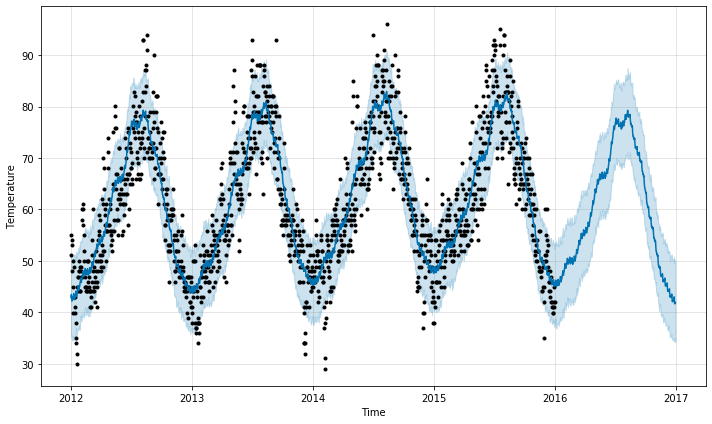

In [12]:
# Plot the model fit and predictions
forecast_plot = model.plot(forecast, 
                           xlabel = 'Time', 
                           ylabel = 'Temperature')

In [13]:
forecast['weekday_name'] = forecast['ds'].dt.day_name()
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,weekday_name
0,2012-01-01,58.650915,35.178215,50.375245,58.650915,58.650915,-15.763320,-15.763320,-15.763320,0.158571,0.158571,0.158571,-15.921891,-15.921891,-15.921891,0.0,0.0,0.0,42.887595,Sunday
1,2012-01-02,58.655062,35.631328,51.231935,58.655062,58.655062,-15.175752,-15.175752,-15.175752,0.743757,0.743757,0.743757,-15.919508,-15.919508,-15.919508,0.0,0.0,0.0,43.479310,Monday
2,2012-01-03,58.659208,35.089489,50.200441,58.659208,58.659208,-16.035212,-16.035212,-16.035212,-0.122741,-0.122741,-0.122741,-15.912472,-15.912472,-15.912472,0.0,0.0,0.0,42.623996,Tuesday
3,2012-01-04,58.663355,34.429813,49.923582,58.663355,58.663355,-16.435735,-16.435735,-16.435735,-0.534699,-0.534699,-0.534699,-15.901036,-15.901036,-15.901036,0.0,0.0,0.0,42.227620,Wednesday
4,2012-01-05,58.667502,34.817963,50.364188,58.667502,58.667502,-16.046800,-16.046800,-16.046800,-0.161503,-0.161503,-0.161503,-15.885296,-15.885296,-15.885296,0.0,0.0,0.0,42.620702,Thursday


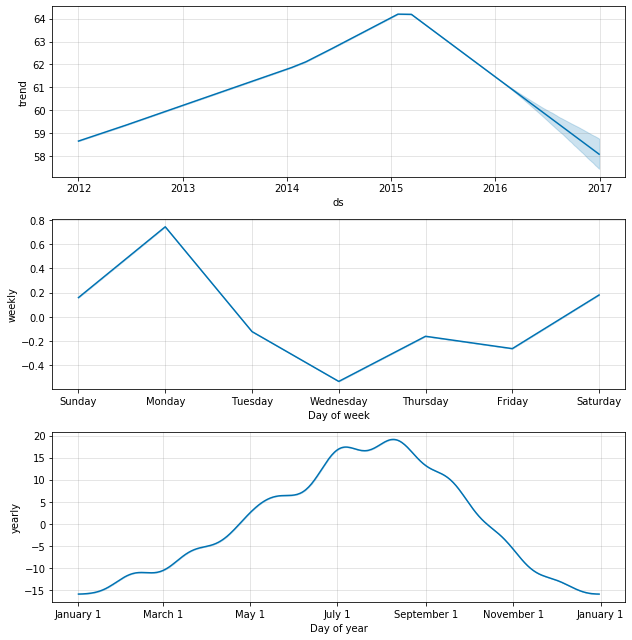

In [14]:
# Decompose the time-series into Seasonal and Non-Seasonal components
components_plot = model.plot_components(forecast)

In [26]:
#pip install --upgrade pandas==0.25.3

     |████████████████████████████████| 10.2 MB 6.0 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.0
    Uninstalling pandas-1.0.0:
      Successfully uninstalled pandas-1.0.0
Note: you may need to restart the kernel to use updated packages.


In [29]:
import fbprophet
print(fbprophet.__version__)

0.5
